# Introduction

This corpus has been collected from free or free for research sources at the Internet:

- A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.
- A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available.
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis
- Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages 

# Loading the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
df=pd.read_csv('SMSSpamCollection',sep='\t', names=['target','message'])

# Exploratory Data Analysis

In [4]:
df.columns

Index(['target', 'message'], dtype='object')

In [5]:
df.head()

target                                            message
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [6]:
df.shape

(5572, 2)

In [7]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [8]:
px.histogram(x=df['target'])

In [9]:
from wordcloud import WordCloud,STOPWORDS

### Preparing Word Cloud for Ham Texts

In [10]:
hamDf = df.loc[df['target']=='ham', :]

In [11]:
words = ' '.join(hamDf['message'])
print(words[:2000])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [12]:
cleaned_word = " ".join([word for word in words.split()
                            if not word.startswith('#')
                                and not word.startswith('&')    
                            ])

In [13]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

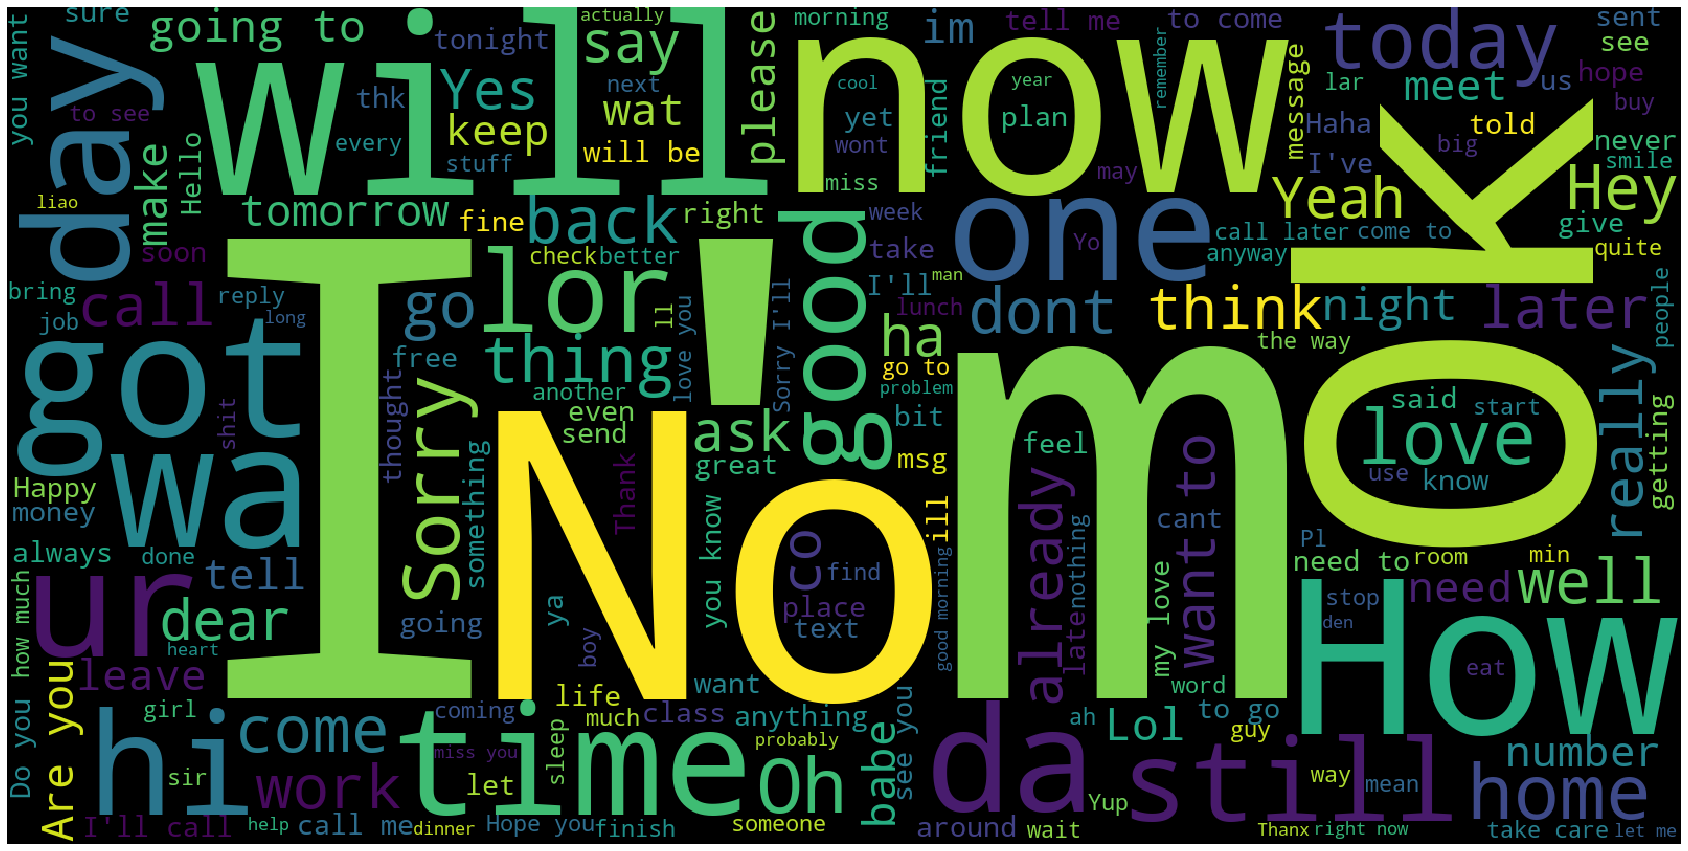

In [14]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observation :** From this, we can observe that words like I'm, No, ok, love, sorry ,etc are more Commonly used words in ham messages. Meaning Most of them are personel messages.

### Preparing Word Cloud for Spam Texts

In [15]:
spamDf = df.loc[df['target']=='spam', :]

In [16]:
words = ' '.join(spamDf['message'])
print(words[:2000])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [17]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('£')
                                and not word.startswith('$')
                            ])

In [18]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

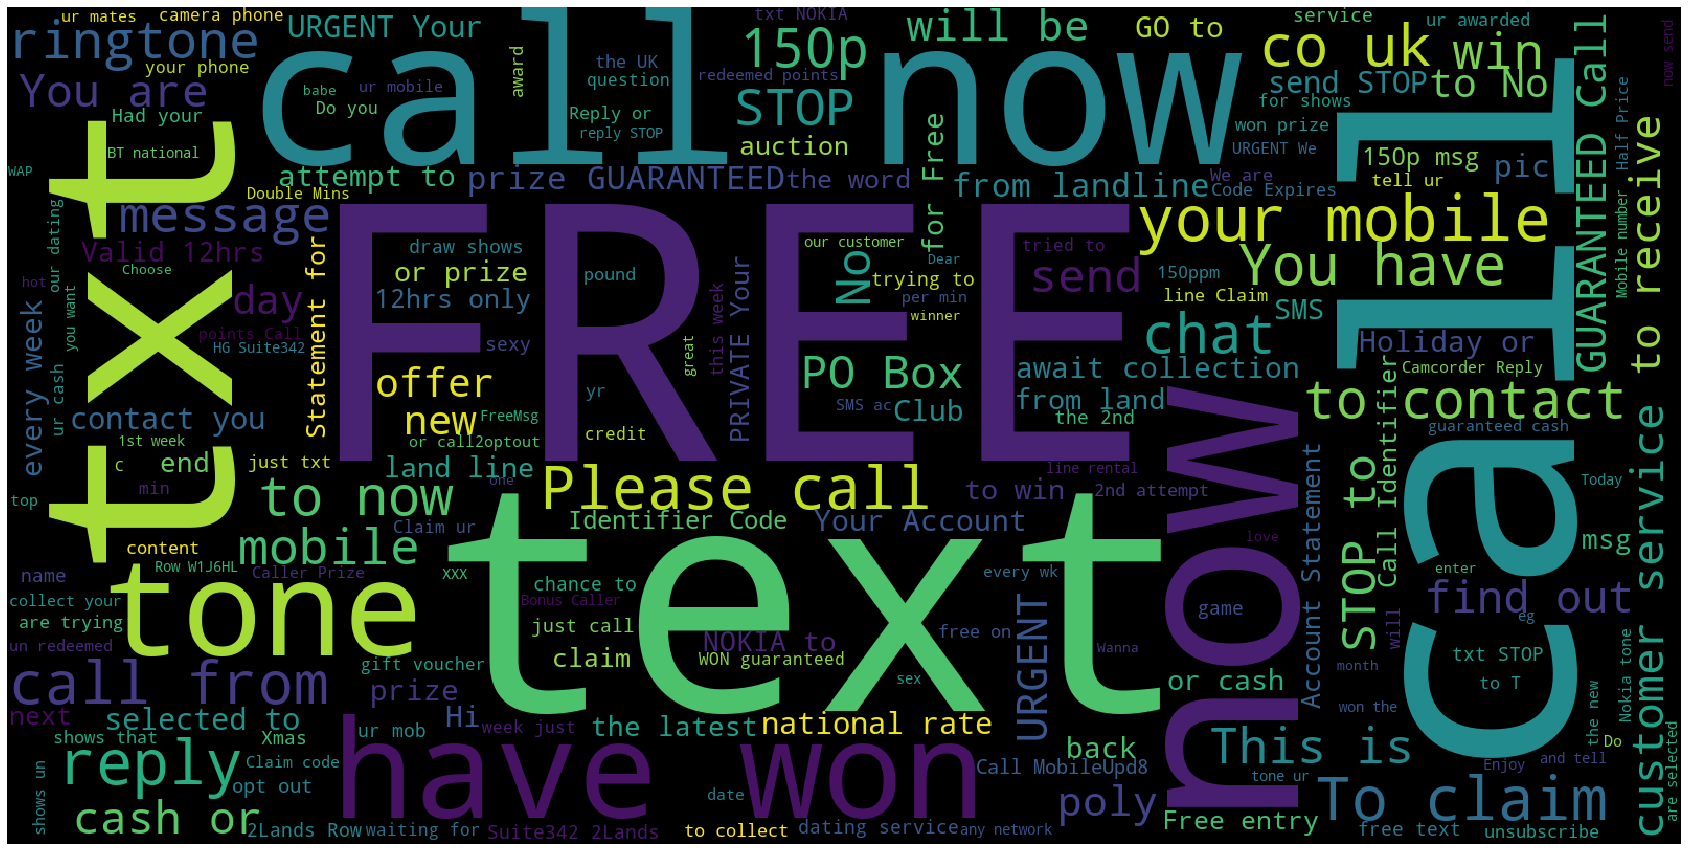

In [19]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observation :** From above Word cloud, we can infer that Maximum of the spam messages are marketing fake sales Highlighting FREE, Asking to call on Fake Numbers, or faking with the prizes for which asking to call or text to claim.

# Data PreProcessing

In [20]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [21]:
#nltk.download('stopwords')
#nltk.download('wordnet')

In [22]:
# initializing the Lemmatizer

lemmatizer = WordNetLemmatizer()

In [23]:
cleanMsgLst = []
msgLenLst = []

In [24]:
def preprocess(rawMsg):
    # Removing special characters and digits
    letters=re.sub("[^a-zA-Z]", " ",rawMsg)
    
    # change sentence to lower case
    letters=letters.lower()

    # tokenize into words
    words=letters.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    cleanMsgLst.append(" ".join(words))
    
    msgLenLst.append(len(words))

In [25]:
cleanMsgLst = []
msgLenLst = []

df['message'].apply(lambda x: preprocess(x))

df['cleanMsg'] = cleanMsgLst

df['msgLength'] = msgLenLst

In [26]:
df.head()

target                                            message  \
0    ham  Go until jurong point, crazy.. Available only ...   
1    ham                      Ok lar... Joking wif u oni...   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3    ham  U dun say so early hor... U c already then say...   
4    ham  Nah I don't think he goes to usf, he lives aro...   

                                            cleanMsg  msgLength  
0  go jurong point crazy available bugis n great ...         16  
1                            ok lar joking wif u oni          6  
2  free entry wkly comp win fa cup final tkts st ...         21  
3                u dun say early hor u c already say          9  
4                nah think go usf life around though          7

# Data Preparation

In [27]:
df['msgCat']=df['target'].apply(lambda x: 0 if x=='ham' else 1)
df.head()

target                                            message  \
0    ham  Go until jurong point, crazy.. Available only ...   
1    ham                      Ok lar... Joking wif u oni...   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3    ham  U dun say so early hor... U c already then say...   
4    ham  Nah I don't think he goes to usf, he lives aro...   

                                            cleanMsg  msgLength  msgCat  
0  go jurong point crazy available bugis n great ...         16       0  
1                            ok lar joking wif u oni          6       0  
2  free entry wkly comp win fa cup final tkts st ...         21       1  
3                u dun say early hor u c already say          9       0  
4                nah think go usf life around though          7       0

In [28]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train,test = train_test_split(df,test_size=0.2,random_state=6)

In [29]:
trainCleanMsg=[]
for msg in train['cleanMsg']:
    trainCleanMsg.append(msg)

testCleanMsg=[]
for msg in test['cleanMsg']:
    testCleanMsg.append(msg)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(trainCleanMsg)

test_features = vectorizer.transform(testCleanMsg)

In [31]:
vectorizer.vocabulary_

{'wow': 6166,
 'love': 3132,
 'sooo': 5025,
 'much': 3485,
 'know': 2897,
 'barely': 437,
 'stand': 5137,
 'wonder': 6133,
 'day': 1273,
 'go': 2173,
 'well': 6025,
 'think': 5490,
 'miss': 3378,
 'sleeping': 4927,
 'surfing': 5303,
 'hey': 2404,
 'inconvenient': 2615,
 'si': 4860,
 'huh': 2515,
 'good': 2190,
 'afternoon': 105,
 'boytoy': 643,
 'feeling': 1850,
 'today': 5575,
 'better': 527,
 'hope': 2468,
 'boy': 639,
 'obedient': 3702,
 'slave': 4924,
 'please': 4035,
 'queen': 4285,
 'sorry': 5031,
 'help': 2390,
 'left': 2989,
 'dessert': 1360,
 'wan': 5956,
 'suntec': 5284,
 'look': 3102,
 'could': 1139,
 'send': 4731,
 'pix': 4012,
 'would': 6163,
 'see': 4708,
 'top': 5608,
 'bottom': 632,
 'nah': 3527,
 'perpetual': 3958,
 'dd': 1278,
 'many': 3237,
 'dependent': 1342,
 'er': 1685,
 'hello': 2388,
 'thing': 5489,
 'quite': 4294,
 'plan': 4020,
 'limping': 3039,
 'slowly': 4945,
 'home': 2453,
 'followed': 1955,
 'aa': 0,
 'exhaust': 1758,
 'hanging': 2317,
 'ball': 422,
 'mov

In [32]:
print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train_features:", type(train_features))
print("Shape of input data", train_features.shape)

Total unique words: 6294
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 6294)


# Model Building and Evaluation

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tqdm import tqdm

### Logistic Regression Model

In [42]:
Classifiers = [LogisticRegression()]   

In [40]:
# Converting sparse matrix to dense

dense_features = train_features.toarray()
dense_test = test_features.toarray()

## Printing Accuracy score

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['msgCat'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['msgCat'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))


100%|████████████████████████████████████████████| 1/1 [00:02<00:00,  2.43s/it]

Accuracy of LogisticRegression is 0.9865470852017937


In [51]:
## Printing Confusion Matrix of Logistic Regression

print('Confusion Matrix : \n', confusion_matrix(pred,test['msgCat']))

Confusion Matrix : 
 [[967  11]
 [ 13 124]]


In [52]:
## Printing Classification Report of Logistic Regression Model

print('Classification Report : \n', classification_report(pred,test['msgCat']))

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       0.92      0.91      0.91       137

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### Decision Trees Model

In [49]:
Classifier = [DecisionTreeClassifier()]

In [50]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

for classifier in tqdm(Classifier):
    fit = classifier.fit(dense_features,train['msgCat'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['msgCat'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))



  0%|                                                    | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████| 1/1 [01:11<00:00, 71.06s/it]

Accuracy of DecisionTreeClassifier is 0.97847533632287


In [53]:
## Printing Confusion Matrix of Decision Tree Model

print('Confusion Matrix : \n', confusion_matrix(pred,test['msgCat']))

Confusion Matrix : 
 [[967  11]
 [ 13 124]]


In [54]:
## Printing Classification Report of Logistic Regression Model

print('Classification Report : \n', classification_report(pred,test['msgCat']))

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       0.92      0.91      0.91       137

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### SVM Model

In [57]:
Classifier = [SVC()]

In [58]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

for classifier in tqdm(Classifier):
    fit = classifier.fit(dense_features,train['msgCat'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['msgCat'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))



  0%|                                                    | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████| 1/1 [03:06<00:00, 186.69s/it]

Accuracy of SVC is 0.9883408071748879


In [59]:
## Printing Confusion Matrix of SVM Model

print('Confusion Matrix : \n', confusion_matrix(pred,test['msgCat']))

Confusion Matrix : 
 [[980  13]
 [  0 122]]


In [60]:
## Printing Confusion Matrix of SVM Model

print('Classification Report : \n', classification_report(pred,test['msgCat']))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       993
           1       0.90      1.00      0.95       122

    accuracy                           0.99      1115
   macro avg       0.95      0.99      0.97      1115
weighted avg       0.99      0.99      0.99      1115

